In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Import the CSV file and display the first 5 rows
df = pd.read_csv('ma3route_crashes_manualcode.csv')
print(df.head())

   crash_id       crash_datetime  crash_date  latitude  longitude  \
0         1  2018-06-06 20:39:54  2018-06-06 -1.263132  36.764283   
1         2  2018-06-30 13:36:54  2018-06-30 -1.295135  36.821932   
2         3  2018-05-26 07:42:54  2018-05-26 -1.371855  36.920457   
3         4  2018-05-26 07:52:24  2018-05-26 -1.209945  36.833230   
4         5  2018-05-26 15:42:24  2018-05-26 -1.215468  36.850638   

   n_crash_reports  contains_fatality_words  contains_pedestrian_words  \
0                1                        0                          0   
1                1                        0                          0   
2                1                        1                          0   
3                1                        0                          0   
4                1                        0                          0   

   contains_matatu_words  contains_motorcycle_words  
0                      0                          0  
1                      0        

In [3]:
df.shape

(2595, 10)

In [4]:
df.describe()

,crash_id,latitude,longitude,n_crash_reports,contains_fatality_words,contains_pedestrian_words,contains_matatu_words,contains_motorcycle_words
count,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000,2595.000000
mean,1573.075530,-1.271065,36.861475,1.583815,0.063969,0.023507,0.080539,0.036609
std,912.156283,0.281333,0.305962,2.421514,0.244745,0.151536,0.272179,0.187836
min,1.000000,-4.059868,34.145808,1.000000,0.000000,0.000000,0.000000,0.000000
25%,729.500000,-1.319624,36.807140,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1644.000000,-1.269274,36.854319,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2292.500000,-1.234151,36.899491,1.000000,0.000000,0.000000,0.000000,0.000000
max,3115.000000,1.257331,40.171389,67.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595 entries, 0 to 2594
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   crash_id                   2595 non-null   int64  
 1   crash_datetime             2595 non-null   object 
 2   crash_date                 2595 non-null   object 
 3   latitude                   2595 non-null   float64
 4   longitude                  2595 non-null   float64
 5   n_crash_reports            2595 non-null   int64  
 6   contains_fatality_words    2595 non-null   int64  
 7   contains_pedestrian_words  2595 non-null   int64  
 8   contains_matatu_words      2595 non-null   int64  
 9   contains_motorcycle_words  2595 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 202.9+ KB


In [6]:
df = df.drop(['latitude', 'longitude','contains_pedestrian_words','contains_fatality_words','contains_matatu_words','contains_motorcycle_words'], axis=1)


In [7]:
print(df.head())

   crash_id       crash_datetime  crash_date  n_crash_reports
0         1  2018-06-06 20:39:54  2018-06-06                1
1         2  2018-06-30 13:36:54  2018-06-30                1
2         3  2018-05-26 07:42:54  2018-05-26                1
3         4  2018-05-26 07:52:24  2018-05-26                1
4         5  2018-05-26 15:42:24  2018-05-26                1


## Number of accidents that happened on May 2018

In [8]:
# Filter the dataframe for accidents that happened in May 2018
may_2018_accidents = df[df['crash_date'].str.startswith('2018-05')]

# Display the number of accidents
num_accidents_may_2018 = may_2018_accidents.shape[0]
print(f"Number of accidents in May 2018: {num_accidents_may_2018}")

Number of accidents in May 2018: 255


## Trend of accidents that happened on 2018 of May

C:\Users\James\AppData\Local\Temp\ipykernel_3200\3865635742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_2018_accidents['crash_date'] = pd.to_datetime(may_2018_accidents['crash_date'])


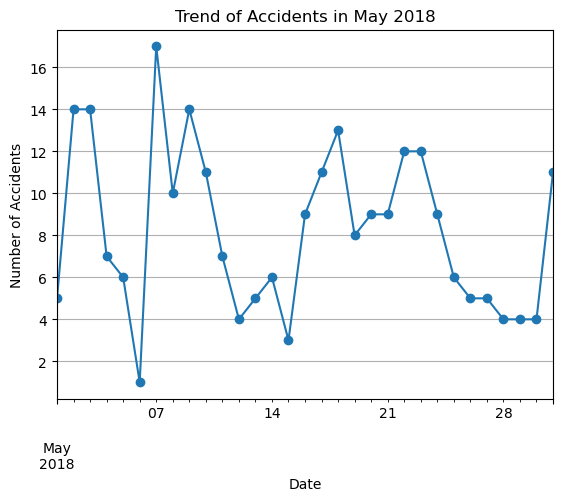

In [9]:
# Convert crash_date to datetime format
may_2018_accidents['crash_date'] = pd.to_datetime(may_2018_accidents['crash_date'])

# Group by crash_date and count the number of accidents each day
daily_accidents = may_2018_accidents.groupby('crash_date').size()

# Plot the trend
daily_accidents.plot(kind='line', marker='o', title='Trend of Accidents in May 2018')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

### The first three months of 2018 that had the highest accident rates

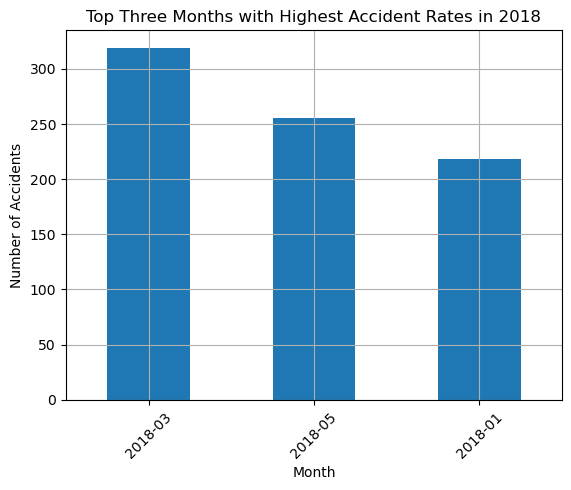

In [10]:
# Convert crash_date to datetime format 
df['crash_date'] = pd.to_datetime(df['crash_date'])

# Filter the dataframe for the year 2018
df_2018 = df[df['crash_date'].dt.year == 2018]

# Group by month and count the number of accidents
monthly_accidents = df_2018.groupby(df_2018['crash_date'].dt.to_period('M')).size()

# Get the top three months with the highest accident rates
top_three_months = monthly_accidents.nlargest(3)

# Plot the results
top_three_months.plot(kind='bar', title='Top Three Months with Highest Accident Rates in 2018')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

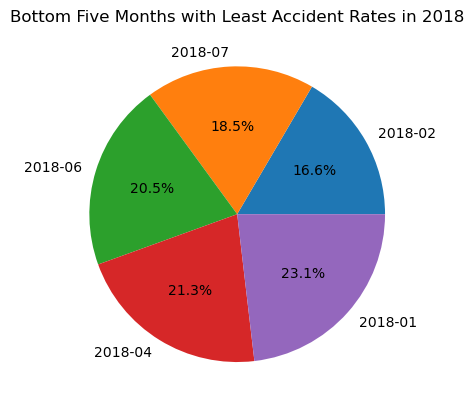

In [11]:
# Get the bottom five months with the least accident rates
bottom_five_months = monthly_accidents.nsmallest(5)

# Plot the results
bottom_five_months.plot(kind='pie', autopct='%1.1f%%', title='Bottom Five Months with Least Accident Rates in 2018')
plt.ylabel('')
plt.show()